In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [4]:
df.tail(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
le = LabelEncoder()

In [10]:
df["Gender"] = le.fit_transform(df["Gender"])

In [11]:
df.head(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77


In [12]:
df["Gender"].unique()

array([1, 0])

([<matplotlib.patches.Wedge at 0x1d14007cdd0>,
 [Text(-0.3091791812062703, 1.620773961386541, 'Male'),
  Text(0.3091791812062705, -1.620773961386541, 'Female')],
 [Text(-0.16864318974887468, 0.8840585243926586, '56.00%'),
  Text(0.1686431897488748, -0.8840585243926586, '44.00%')])

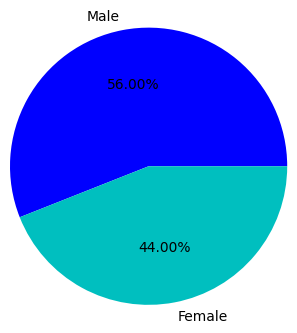

In [13]:
plt.figure(figsize= (3, 3))
label = ["Male", "Female"]
 
plt.pie(df["Gender"].value_counts(),
        labels= label, 
        radius= 1.5,
        colors= ["b", "c"],
        autopct= "%0.2f%%")

In [14]:
X = df.drop("CustomerID", axis= 1)

In [15]:
scale = StandardScaler()

In [16]:
X_scale = scale.fit_transform(X)

In [17]:
g_m = GaussianMixture(n_components= 2, n_init= 10, max_iter= 100)

In [18]:
g_m.fit(X_scale)

GaussianMixture(n_components=2, n_init=10)

In [19]:
g_m.means_

array([[ 1.12815215,  0.06866767,  0.06363885, -0.0655555 ],
       [-0.88640526, -0.05395317, -0.05000195,  0.05150789]])

In [20]:
g_m.converged_

True

In [21]:
g_m.n_init

10

In [22]:
g_m.n_iter_

2

In [23]:
g_m.predict(X_scale)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [24]:
g_m.weights_

array([0.44, 0.56])

In [25]:
labels = g_m.predict(X_scale)

In [26]:
df["Label"] = labels

In [27]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,1
3,4,0,23,16,77,1
4,5,0,31,17,40,1
